# Mobius Transforms on the Poincare Models of Geometry

Herein we show how to use the two poincare models of hyperbolic geometry (the disc and the half-plane) in conjunction with mobius transforms to visuals relatively complicated transformations of the hyperbolic plane on the visualization-friendly poincare disc. Below is an implementation of a transformation I found claiming to translate the poincare disc to a new origin.

<IPython.core.display.Javascript object>


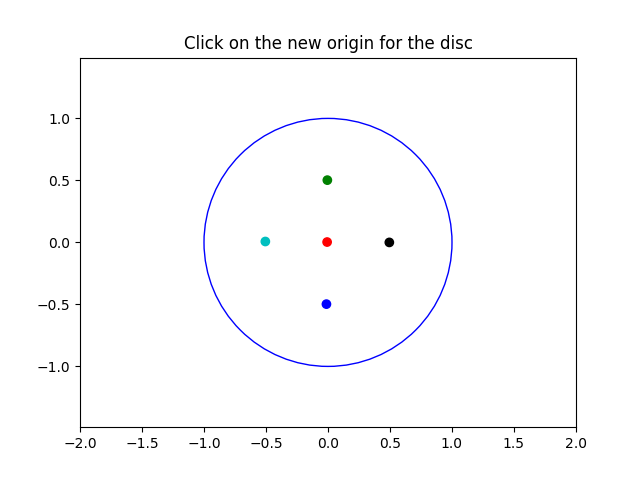

In [43]:
%matplotlib notebook
from functools import partial
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
n_img = 4
img = np.random.rand(10)
fig,ax = plt.subplots()
ax.axis('equal')
ax.axis([-2, 2, -2, 2])
bound = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(bound)
scat = None

points = [(0+0.j, 'r'), (0+0.5j, 'g'), (0-0.5j, 'b'), (0.5+0j, 'k'), (-0.5+0j, 'c')]

def pltpoints(points):
    global ax
    global scat
    if scat != None:
        scat.remove()
    plt.title('Click on the new origin for the disc')
    coordinates = [coord for coord,_ in points]
    colors = [color for _,color in points]
    scat = ax.scatter(x=[x.real for x in coordinates], y=[y.imag for y in coordinates], color=colors)

def mobius(z, z1, theta=0):
    ret = ((z-z1)/(1-z*(z1.conjugate())))
    #ret = (z-z1.real)/z1.imag
    plt.title(str(ret))
    return ret

def onclick(event):
    global points
    click = complex(event.xdata, event.ydata)
    if abs(click) < 1:
        plt.title(str(click))
        points = [(mobius(z, click), c) for z, c in points]
        #plt.title(mobius((0+0j), click))
        pltpoints(points)
    else:
        plt.title(str('clicked off the disc'))

pltpoints(points)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

First, let's define a mobius tranformation: This is any function of the form $z \mapsto \frac{az+b}{cz+d} \ni (z, a, b, c, d \in \mathbb{C}) \wedge (ad-bc \neq 0) $. Simple mobius transformations are dilation, translation, and inversion (as discussed in class). The following video may help understand these translations and how they are related.

Some properties of mobius transformations are as follows:
* Circles map to circles or lines
* Lines map to lines or circles
* Angles are preserved
* Compositions of mobius transformations are also mobius transformations


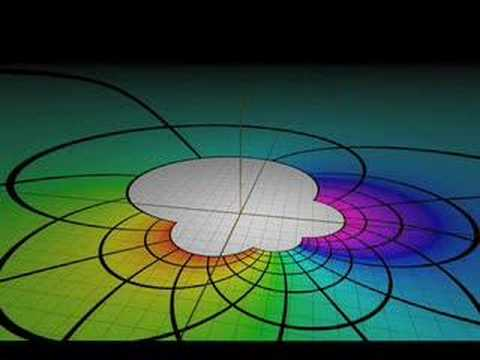

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo('JX3VmDgiFnY')

It also helps to understand how the poincare disc translates to and from the plane. We use the mobius transformation $\mathbb{H} \rightarrow \mathbb{D}: z \mapsto \frac{iz+1}{z+i}$ (note that $a=i, b=1, c=1, d=i,$ so $ad-bc=-2$). There is a variation of this called the Cayley transformation which goes $z \mapsto \frac{z-i}{z+i}$

<IPython.core.display.Javascript object>


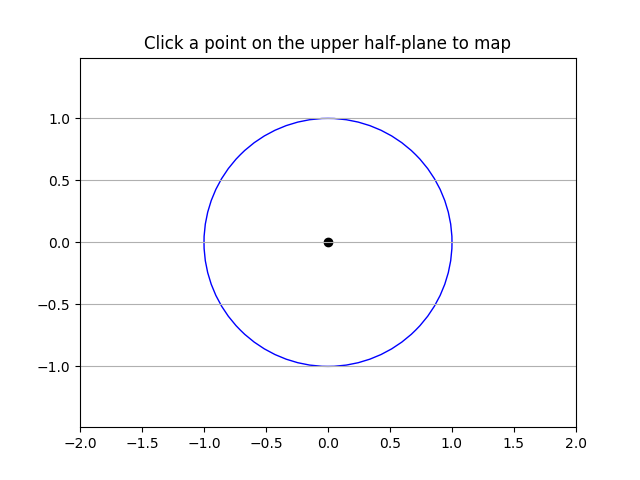

In [3]:
%matplotlib notebook
from functools import partial
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
import random as rand
n_img = 4
img = np.random.rand(10)
fig,ax = plt.subplots()
ax.axis('equal')
ax.axis([-2, 2, -2, 2])
circ = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(circ)
ax.yaxis.grid(True)
scat = None

points = [(0+0j, 'k')]

def pltpoints(points):
    global ax
    global scat
    if scat != None:
        scat.remove()
    plt.title('Click a point on the upper half-plane to map to the disc')
    coordinates = [coord for coord,_ in points]
    colors = [color for _,color in points]
    scat = ax.scatter(x=[x.real for x in coordinates], y=[y.imag for y in coordinates], color=colors)

def transform(z):
    ret = (z*1j+1)/(z+1j)
    plt.title('Click goes to ' + str(ret))
    return ret

def onclick(event):
    global points
    click = complex(event.xdata, event.ydata)
    points.append((transform(click), rand.choice(['r', 'g', 'b', 'c', 'm', 'y', 'k'])));
    plt.title(points)
    pltpoints(points)

pltpoints(points)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

The inverse transformation is $\mathbb{D} \rightarrow \mathbb{H}: z \mapsto \frac{1-iz}{z-i}$. This can be easily found in the usual way.

<IPython.core.display.Javascript object>


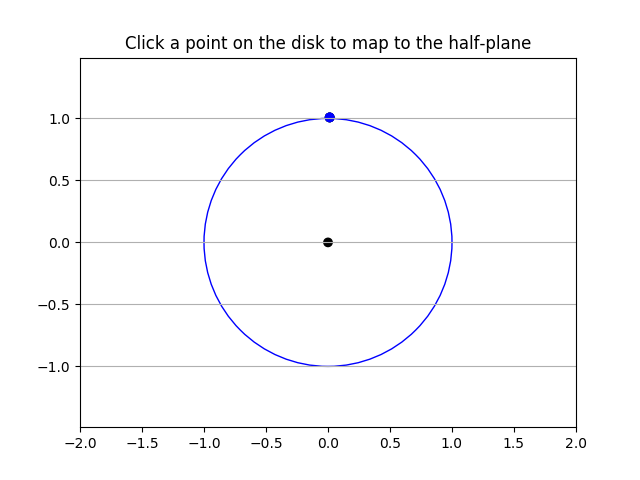

In [21]:
%matplotlib notebook
from functools import partial
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
import random as rand
n_img = 4
img = np.random.rand(10)
fig,ax = plt.subplots()
ax.axis('equal')
ax.axis([-2, 2, -2, 2])
circ = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(circ)
ax.yaxis.grid(True)
scat = None

points = [(0+0j, 'k')]

def pltpoints(points):
    global ax
    global scat
    if scat != None:
        scat.remove()
    plt.title('Click a point on the disk to map to the half-plane')
    coordinates = [coord for coord,_ in points]
    colors = [color for _,color in points]
    scat = ax.scatter(x=[x.real for x in coordinates], y=[y.imag for y in coordinates], color=colors)

def transform(z):
    ret = (1-z*1j)/(z-1j)
    plt.title('Click goes to ' + str(ret))
    return ret

def onclick(event):
    global points
    click = complex(event.xdata, event.ydata)
    points.append((transform(click), rand.choice(['r', 'g', 'b', 'c', 'm', 'y', 'k'])));
    plt.title(points)
    pltpoints(points)

pltpoints(points)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

A horizontal translation (moving z1 to have a real part of 0) in the poincare half-plane model is relatively simple: shift each euclidean coordinate by the difference in the real component: $\mathbb{H} \rightarrow \mathbb{H}:z \mapsto \frac{1z-Re(z_1)}{0z+1}$ (Note that Re() will always yield a real (constant) value, so $ad-bc = (1*1)-(0*x)$ (real x) $= 1$.

A dilation taking z1 to have a real part of 1 is also relatively trivial: $\mathbb{H} \rightarrow \mathbb{H}:z \mapsto \frac{\frac{1}{Im(z_1)}*z+0}{0z+1}$. Since z1 is also a point in the upper half-plane, 1 over its real part will always yield a real constant positive value.

Composing these together gives us a mobius transformation taking z1 to i and translating/dilating every point along with it: $\mathbb{H} \rightarrow \mathbb{H}:z \mapsto \frac{\frac{1}{Im(z_1)}*\frac{1z-Re(z_1)}{0z+1}+0}{0\frac{1z-Re(z_1)}{0z+1}+1} = \frac{1}{Im(z_1)}*\frac{1z-Re(z_1)}{0z+1} = \frac{1z-Re(z_1)}{Im(z_1)}$


<IPython.core.display.Javascript object>


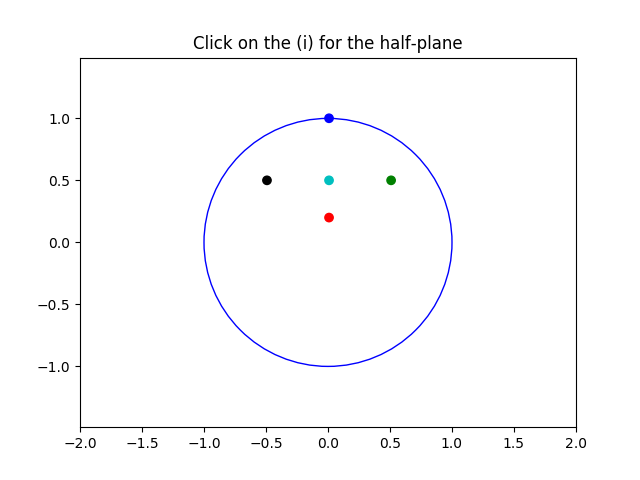

In [51]:
%matplotlib notebook
from functools import partial
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
n_img = 4
img = np.random.rand(10)
fig,ax = plt.subplots()
ax.axis('equal')
ax.axis([-2, 2, -2, 2])
bound = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(bound)
scat = None

points = [(0+0.2j, 'r'), (0.5+0.5j, 'g'), (0+1j, 'b'), (-0.5+0.5j, 'k'), (0+0.5j, 'c')]

def pltpoints(points):
    global ax
    global scat
    if scat != None:
        scat.remove()
    plt.title('Click on the (i) for the half-plane')
    coordinates = [coord for coord,_ in points]
    colors = [color for _,color in points]
    scat = ax.scatter(x=[x.real for x in coordinates], y=[y.imag for y in coordinates], color=colors)

def mobius(z, z1, theta=0):
    #ret = ((z-z1)/(1-z*(z1.conjugate())))
    ret = (z-z1.real)/z1.imag
    plt.title(str(ret))
    return ret

def onclick(event):
    global points
    click = complex(event.xdata, event.ydata)
    if click.imag > 0:
        plt.title(str(click))
        points = [(mobius(z, click), c) for z, c in points]
        #plt.title(mobius((0+0j), click))
        pltpoints(points)
    else:
        plt.title(str('clicked off the half-plane'))

pltpoints(points)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

We now can compose this with our $\mathbb{H} \rightarrow \mathbb{D}$ map (and its inverse) to handle clicks. Ie, map $z_\mathbb{D}$ to $z_\mathbb{H}$, shift on $\mathbb{H}$, then map the new $z_\mathbb{H}$ to a new $z_\mathbb{D}$.

<IPython.core.display.Javascript object>


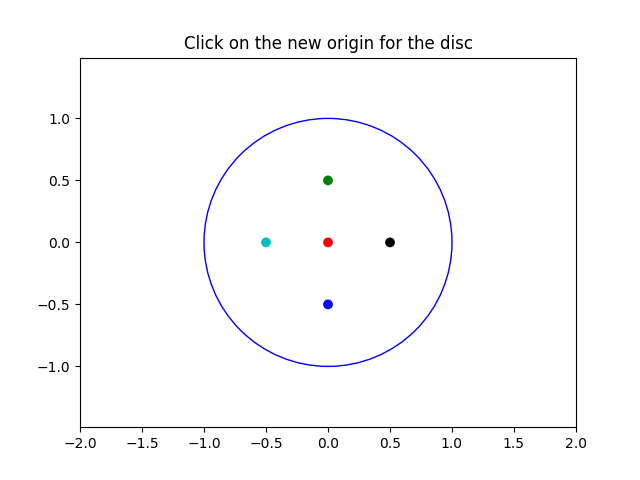

In [69]:
%matplotlib notebook
from functools import partial
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
n_img = 4
img = np.random.rand(10)
fig,ax = plt.subplots()
ax.axis('equal')
ax.axis([-2, 2, -2, 2])
bound = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(bound)
scat = None

points = [(0+0.j, 'r'), (0+0.5j, 'g'), (0-0.5j, 'b'), (0.5+0j, 'k'), (-0.5+0j, 'c')]

def pltpoints(points):
    global ax
    global scat
    if scat != None:
        scat.remove()
    plt.title('Click on the new origin for the disc')
    coordinates = [coord for coord,_ in points]
    colors = [color for _,color in points]
    scat = ax.scatter(x=[x.real for x in coordinates], y=[y.imag for y in coordinates], color=colors)
    
def planeToDisc(z): 
    ret = (z*1j+1)/(z+1j)
    plt.title('Click goes to ' + str(ret))
    return ret

def discToPlane(z):
    ret = (1-z*1j)/(z-1j)
    plt.title('Click goes to ' + str(ret))
    return ret
    
def shiftPointWithZ1atI(z, z1):
    #ret = ((z-z1)/(1-z*(z1.conjugate())))
    ret = (z-z1.real)/z1.imag
    plt.title("shifting "+str(z)+" to "+str(ret))
    return ret

def onclick(event):
    global points
    click = discToPlane(complex(event.xdata, event.ydata))
    if click.imag > 0:
        plt.title("Clicked at "+str(click))
        points = [(planeToDisc(shiftPointWithZ1atI(discToPlane(z), click)), c) for z, c in points]
        #plt.title(mobius((0+0j), click))
        pltpoints(points)
    else:
        plt.title(str('clicked off the disc'))

pltpoints(points)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

You can see that the effect is a true translation of the poincare disc (though the effect differs slightly from the one yielded by the first example)